In [0]:
import numpy as np 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
from scipy.stats import uniform,randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import ClusterCentroids, TomekLinks,RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import PrecisionRecallCurve

import random
random.seed(1301) 

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
path = r'/gdrive/My Drive/KAEMH/newyear_newyou/dataset_allfeatures.csv'
train_data=pd.read_csv(path,index_col=0)

In [0]:
path = r'/gdrive/My Drive/KAEMH/newyear_newyou/totalenrolls_allfeatures.csv'
train_data=pd.read_csv(path,index_col=0)

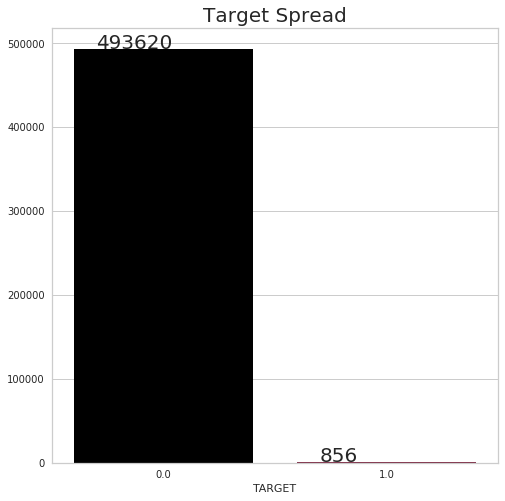

In [0]:
dims = (8,8)
x=['Did not enroll','Enrolled']
fig, ax = plt.subplots(figsize=dims)
sns.set_style('white') 

ax=sns.countplot(ax=ax,data=train_data,x="TARGET",palette=["#000000","#8c1D40"],linewidth=0)
ax.get_frame_on()
ax.set_ylabel('')

#ax.set_xbound(fontsize=20)
ax.set_title("Target Spread",fontsize=20)

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+200),fontsize=20)


In [0]:
def display_all(df):

    """display the datafile at once.""" 
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [0]:
#preparing the data for train_test_split

x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

In [0]:
feature_names_10 = ['Record.Type.DescReligious.Organization','Record.Type.DescStudent','Record.Type.DescPersonal.or.Family.Foundation','Record.Type.DescOther.Organization','Record.Type.DescGovernment.Organization','Record.Type.DescFundraising.Consortium','Record.Type.DescFoundation','IQ','Record.Type.DescEstate.of.Thunderbird.Alumus.a','Record.Type.DescEstate.of.Alumnus.a']

In [0]:
#applying the normalization with PCA

x_normalized = normalize(x, axis=0)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normalized)
x['PCA1'] = x_pca[:,0]
x['PCA2'] = x_pca[:,1]

In [0]:
eigenvalues=pca.components_
eigenvalues

array([[ 0.00255251,  0.00298785,  0.00099214, ..., -0.00014592,
         0.00125054,  0.00305247],
       [-0.01770597,  0.01406605,  0.00313463, ..., -0.0001386 ,
         0.00056761, -0.00134516]])

In [0]:
N_elements=10

PCA1=abs(eigenvalues[:,:])
PCA1.sort(axis=0)
PCA1=PCA1[::-1]
PCA1=PCA1[0:N_elements]
PCA1[1][:10]

array([2.55251415e-03, 2.98784784e-03, 9.92140135e-04, 2.23416860e-03,
       8.68987991e-07, 5.12489951e-04, 4.63136471e-04, 8.21444539e-03,
       5.03875111e-05, 7.68756332e-03])

In [0]:
#Accessing eigen values of PCA1 and PCA 

pc = np.abs(pca.components_[:,:])
pc.sort()
pc1=pc[0][::-1][:10]
pc2=pc[1][::-1][:10]
print(pc1)
print(pc2)


[0.0957134  0.09565242 0.09561274 0.09560647 0.09558262 0.09558049
 0.09557808 0.09557794 0.09557505 0.0955648 ]
[0.14368998 0.1433606  0.13985366 0.12965068 0.12931337 0.12836397
 0.1263854  0.12475317 0.12364121 0.1224002 ]


In [0]:
features = np.abs(pca.components_[:,:]).argsort()[::-1]
print(features)

[[ 34  35  33 ... 269 310 284]
 [ 33  17  20 ... 390 435 440]]


In [0]:
x.iloc[:,features[1][:10]]  

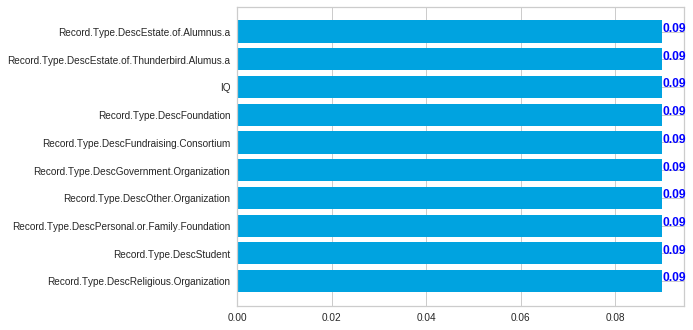

In [0]:
#horizontal bar graph for PCA1
 
# Make fake dataset
height = [0.09, 0.09, 0.09, 0.09, 0.09, 0.09,0.09,0.09, 0.09,0.09]
bars = ('Record.Type.DescReligious.Organization','Record.Type.DescStudent','Record.Type.DescPersonal.or.Family.Foundation','Record.Type.DescOther.Organization','Record.Type.DescGovernment.Organization','Record.Type.DescFundraising.Consortium','Record.Type.DescFoundation','IQ','Record.Type.DescEstate.of.Thunderbird.Alumus.a','Record.Type.DescEstate.of.Alumnus.a')
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height,color='#00A3E0')
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

ylocs, ylabs = plt.yticks()
y= [0.09, 0.09, 0.09, 0.09, 0.09, 0.09,0.09,0.09, 0.09,0.09]

#for i, v in enumerate(y):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

for i, v in enumerate(y):
    plt.text(v , i , str(v), color='blue', fontweight='bold')
 
# Show graphic
plt.show()


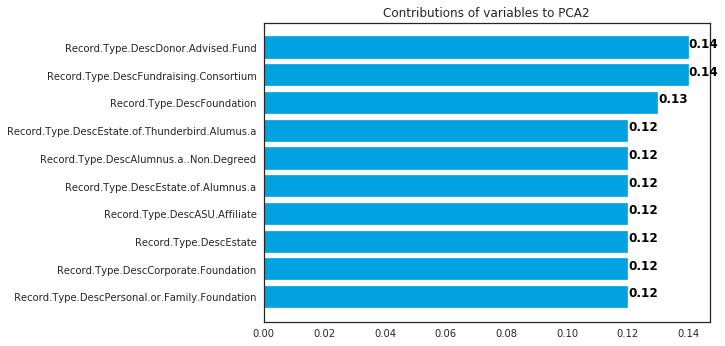

In [0]:
#horizontal bar graph for PCA1
 
# Make fake dataset
height = [0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,0.14,0.14]
bars = ('Record.Type.DescDonor.Advised.Fund','Record.Type.DescFundraising.Consortium','Record.Type.DescFoundation','Record.Type.DescEstate.of.Thunderbird.Alumus.a','Record.Type.DescAlumnus.a..Non.Degreed',
        'Record.Type.DescEstate.of.Alumnus.a','Record.Type.DescASU.Affiliate','Record.Type.DescEstate','Record.Type.DescCorporate.Foundation',' Record.Type.DescPersonal.or.Family.Foundation')
bars=bars[::-1]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height,color='#00A3E0')
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title('Contributions of variables to PCA2')

ylocs, ylabs = plt.yticks()
y= [0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,0.14,0.14]

#for i, v in enumerate(y):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

for i, v in enumerate(y):
    plt.text(v , i , str(v), color='black', fontweight='bold')
 
# Show graphic
plt.show()
 

In [0]:
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

constant_features_test = set(identify_constant_features(x))

print('There were {} constant features in dataset.'.format(len(constant_features_test)))
print(constant_features_test)

There were 17 constant features in dataset.
{'Record.Type.DescFoundation', 'Record.Type.DescASU.Affiliate', 'Record.Type.DescStudent', 'Record.Type.DescCorporate.Foundation', 'Record.Type.DescGovernment.Organization', 'Record.Type.DescPersonal.or.Family.Foundation', 'Record.Type.DescEstate.of.Alumnus.a', 'IQ', 'AdmitType', 'Record.Type.DescFundraising.Consortium', 'Record.Type.DescEstate.of.Thunderbird.Alumus.a', 'Record.Type.DescOther.Organization', 'Record.Type.DescDonor.Advised.Fund', 'Record.Type.DescReligious.Organization', 'Record.Type.DescCorporation', 'Record.Type.DescEstate', 'Record.Type.DescAlumnus.a..Non.Degreed'}


In [0]:
#Scaling the data and preparing for feature selection

#p=86 Auc score overall : 0.8612
#p=86 Auc score with Undersamplimg : 0.8840
#p=75 Auc score with Undersamplimg : 0.8886
#p=60  #AUC score with Undersampling : 0.8920
#p=70 AUC score with undersampling : 0.8868
p=60

x_bin = Binarizer().fit_transform(scale(x))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(x_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 13  15  17  18  19  20  21  22  24  25  26  28  33  34  35 145 619] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
#features selection using chi2

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(x.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),chi2_selected_features))

In [0]:
#features selection using f_classif

f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(x.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),f_classif_selected_features))

In [0]:
#common features

selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(x.columns, selected) if s]
print (features)

In [0]:
#selecting the final features and splitting the data

x_feature=x[features]


x_train, x_test, y_train, y_test = train_test_split(x_feature.values, y, random_state=1301, stratify=y, test_size=0.25)


In [0]:
x_train=pd.DataFrame(x_train,columns=x_feature.columns)
x_test=pd.DataFrame(x_test,columns=x_feature.columns)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [0]:
x_train.head()

,Alumni_Id,Age,Gender.M,Local,Pref.Class.Year,Ethnic.Desc,Ethnic.DescAmerican.Indian.Alaska.Native,Ethnic.DescAsian,Ethnic.DescBlack,Ethnic.DescRace.and.Ethnicity.Unknown,Ethnic.DescTwo.or.More.Races,Record.Type.DescFaculty.Staff,Record.Type.DescParent,Record.Type.DescPast.Faculty.Staff,Record.Type.DescPast.Parent,Affiliated,Affil.Code.DescAA.Alumni.Ambassadors,Affil.Code.DescAA.Sparky.License.Plate,Affil.Code.DescAA.Starbucks.CAP,Affil.Code.DescAA.SunDevils..Advocacy.Network,Affil.Code.DescAA.US.Military.Veteran,Affil.Code.DescFlinn.Brown.Civic.Leadership.Academy,Affil.Code.DescOther,MemberCurrent.Member,Member.LevelGold,Activity.Participation.DescNo.Show,Activity.Participation.DescRegistered,User.Group.DescASU.Enterprise.Marketing.Hub,User.Group.DescCollege...Sandra.Day.O.Connor.College.of.Law,User.Group.DescFDN.IRM,User.Group.DescFDN.PCEP,User.Group.DescZ..Foundation,CoursePerf,NUM_UNDERGRAD_DEGREES,NUM_GRAD_DEGREES,NUM_LAW_DEGREES,ACADCAREERLENGTH,TOTALSTUDENTWORKERHRS,AVGSTUDENTWORKERHRSDAILY,NUMDAYSWORKED,...,Athletics.NumClicks,Athletics.AllUnsubs,Athletics.AnyUnsubs,Foundation.NumSent,Foundation.NumOpens,Foundation.NumClicks,Hub.NumSent,Hub.NumOpens,Hub.NumClicks,Alumni.PrctOpen,Alumni.PrctClicks,Alumni.PrctClicksAll,ASUNow.PrctOpen,ASUNow.PrctClicks,ASUNow.PrctClicksAll,Athletics.PrctOpen,Athletics.PrctClicks,Athletics.PrctClicksAll,Foundation.PrctOpen,Foundation.PrctClicks,Foundation.PrctClicksAll,Hub.PrctOpen,Hub.PrctClicks,Hub.PrctClicksAll,OpenRate,ClickRate,ClickAllRate,Segment_Disconnected,Segment_Lifelong Learner,Segment_Self-actualizer,Segment_Socially Involved,SecondSegment_Lifelong Learner,SecondSegment_Self-actualizer,SecondSegment_Socially Involved,AFFINITY_RATING_Athletically Involved,AFFINITY_RATING_Disconnected,AFFINITY_RATING_Lifelong Learner,AFFINITY_RATING_Self Actualizer,PCA1,PCA2
0,9906.0,67.0,1.0,1.0,1979.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267892,0.852021,0.286917,0.017796,1604.900945,38.767917,0.247718,8.952351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000341,-0.006924
1,39594.0,85.0,1.0,1.0,1959.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267892,0.852021,0.286917,0.017796,1604.900945,38.767917,0.247718,8.952351,...,0.0,0.0,0.0,20.0,3.0,0.0,7.0,2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.150000,0.0,0.0,0.285714,0.00,0.0,0.087143,0.00000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000118,0.002763
2,1282649.0,29.0,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.640817,1.000000,1.000000,0.000000,1797.000000,137.250000,3.050000,45.000000,...,0.0,0.0,0.0,23.0,4.0,0.0,5.0,4.0,1.0,0.222222,0.111111,0.024691,0.0,0.0,0.0,0.14,0.0,0.0,0.173913,0.0,0.0,0.800000,0.25,0.2,0.267227,0.05858,0.044938,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001025,-0.007538
3,902550.0,31.0,1.0,1.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.922265,3.000000,0.000000,0.000000,1361.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.011456,-0.007851
4,143436.0,53.0,1.0,1.0,1991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.370796,1.000000,0.000000,0.000000,1208.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.00000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000661,0.012920


In [0]:
ratio=float(np.sum(y_train.values == 0) )/ np.sum(y_train.values==1)
print(ratio)

576.6588785046729


In [0]:
#using XGboost with actual train and test

xgb_model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1, seed=1301,subsample=1.0,reg_alpha=0.03, gamma=0.3,max_depth=5,is_unbalance=False,num_leaves=4,scale_pos_weight=ratio,colsample_bytree=0.9,n_thread=4)
xgb_model.fit(x_train, y_train,early_stopping_rounds=50,eval_metric="auc",eval_set=[(x_train,y_train),(x_test,y_test)])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.986689	validation_1-auc:0.985943
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.992052	validation_1-auc:0.990256
[2]	validation_0-auc:0.991138	validation_1-auc:0.988913
[3]	validation_0-auc:0.991138	validation_1-auc:0.988913
[4]	validation_0-auc:0.991417	validation_1-auc:0.988991
[5]	validation_0-auc:0.996925	validation_1-auc:0.996094
[6]	validation_0-auc:0.997468	validation_1-auc:0.996042
[7]	validation_0-auc:0.998151	validation_1-auc:0.996985
[8]	validation_0-auc:0.998973	validation_1-auc:0.997777
[9]	validation_0-auc:0.998972	validation_1-auc:0.997765
[10]	validation_0-auc:0.99906	validation_1-auc:0.99787
[11]	validation_0-auc:0.999174	validation_1-auc:0.998049
[12]	validation_0-auc:0.999423	validation_1-auc:0.998959
[13]	validation_0-auc:0.999445	validation_1-auc:0.999093
[14]	validation_0-auc:0.999473	validation_1-auc:0.999265


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.3,
              is_unbalance=False, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, n_thread=4, nthread=None, num_leaves=4,
              objective='binary:logistic', random_state=0, reg_alpha=0.03,
              reg_lambda=1, scale_pos_weight=576.6588785046729, seed=1301,
              silent=None, subsample=1.0, verbosity=1)

In [0]:
print('Overall AUC:', roc_auc_score(y_test, xgb_model.predict_proba(x_test, ntree_limit=xgb_model.best_iteration)[:,1]))

Overall AUC: 0.9995474402913892


In [0]:
y_pred_train=pd.DataFrame(xgb_model.predict(x_train),columns=["TARGET"])

y_pred_train.TARGET.value_counts()

print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    370215
         1.0       0.75      0.98      0.85       642

    accuracy                           1.00    370857
   macro avg       0.88      0.99      0.93    370857
weighted avg       1.00      1.00      1.00    370857

[[370008    207]
 [    10    632]]


In [0]:
y_pred = xgb_model.predict(x_test,ntree_limit=xgb_model.best_iteration)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[123327     78]
 [     6    208]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123405
         1.0       0.73      0.97      0.83       214

    accuracy                           1.00    123619
   macro avg       0.86      0.99      0.92    123619
weighted avg       1.00      1.00      1.00    123619



In [0]:
auc = roc_auc_score(y_test, xgb_model.predict(x_test))
print("Performance : ", auc)

Performance :  0.9903219662330591


In [0]:
visualizer = ROCAUC(xgb_model)

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_tree(xgb_model, num_trees=4, ax=ax,feature_names=x.columns)
plt.show()

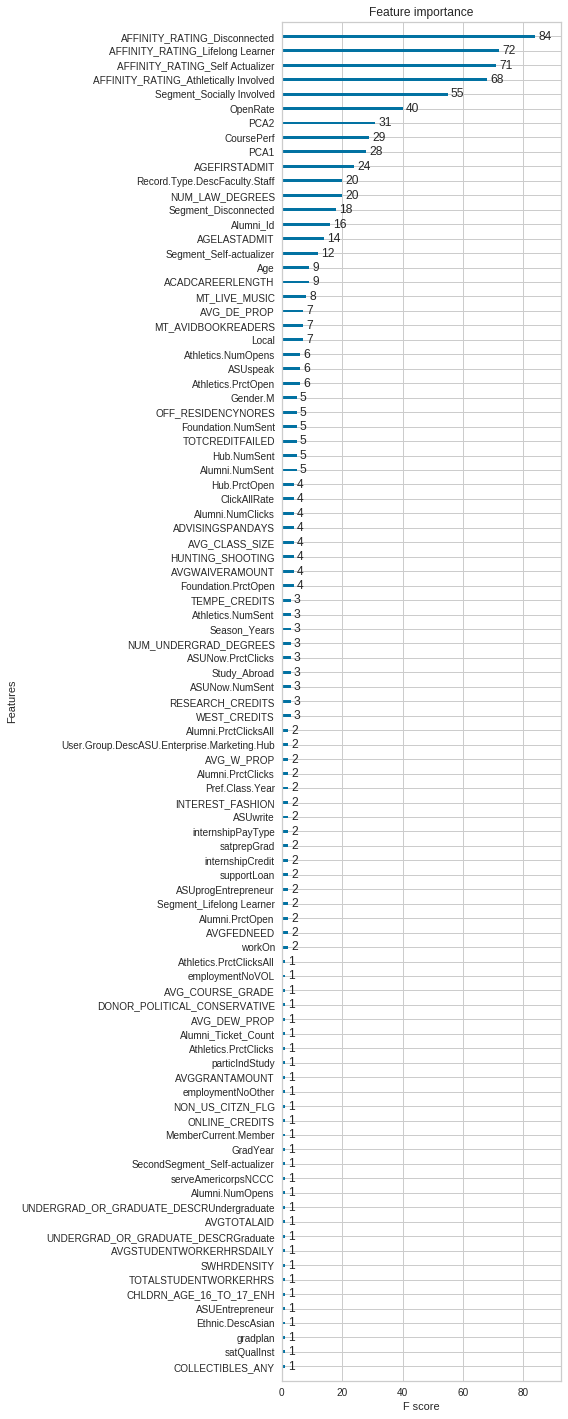

AttributeError: ignored

In [0]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [15, 22]
plt.show()

importances = xgb_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in xgb_model.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center",fontzise=20)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices,fontzise=30)
plt.ylim([-1, X.shape[1]])
plt.show()

In [0]:
#using XGboost with Random Under sampling
rus = RandomUnderSampler(return_indices=True,ratio=0.25)
x_rus, y_rus, id_rus = rus.fit_sample(x_train, y_train)

print('Removed indexes:', id_rus)


In [0]:
print(len(y_rus[y_rus==0]))
print(len(y_rus[y_rus==1]))

In [0]:
#using XGboost 

xgb_model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1, seed=1301,subsample=1.0,reg_alpha=0.03, gamma=0.3,max_depth=5,is_unbalance=False,num_leaves=31,scale_pos_weight=4,colsample_bytree=0.5,n_thread=4)
xgb_model.fit(x_rus, y_rus,early_stopping_rounds=50,eval_metric="auc",eval_set=[(x_rus,y_rus),(x_test,y_test)])



In [0]:
print('Overall AUC:', roc_auc_score(y_test, xgb_model.predict_proba(x_test, ntree_limit=xgb_model.best_iteration)[:,1]))

Overall AUC: 0.999416517378573


In [0]:
y_pred_train=pd.DataFrame(xgb_model.predict(x_rus),columns=["TARGET"])

y_pred_train.TARGET.value_counts()

print(classification_report(y_rus,y_pred_train))
print(confusion_matrix(y_rus,y_pred_train))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2568
         1.0       1.00      1.00      1.00       642

    accuracy                           1.00      3210
   macro avg       1.00      1.00      1.00      3210
weighted avg       1.00      1.00      1.00      3210

[[2568    0]
 [   0  642]]


In [0]:
y_pred = xgb_model.predict(x_test,ntree_limit=xgb_model.best_iteration)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[123213    192]
 [     3    211]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123405
         1.0       0.52      0.99      0.68       214

    accuracy                           1.00    123619
   macro avg       0.76      0.99      0.84    123619
weighted avg       1.00      1.00      1.00    123619



In [0]:
auc = roc_auc_score(y_test, xgb_model.predict(x_test))
print("Performance : ", auc)

Performance :  0.9922248829645719


In [0]:
y_pred_fullset = xgb_model.predict(x_feature.values,ntree_limit=xgb_model.best_iteration)

print(confusion_matrix(y, y_pred_fullset))
print(classification_report(y,y_pred_fullset))


[[492843    777]
 [     3    853]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    493620
         1.0       0.52      1.00      0.69       856

    accuracy                           1.00    494476
   macro avg       0.76      1.00      0.84    494476
weighted avg       1.00      1.00      1.00    494476



In [0]:
y_pred_proba = xgb_model.predict_proba(x_feature.values,ntree_limit=xgb_model.best_iteration)



In [0]:
#prediction file with score

pred=pd.DataFrame(y_pred_proba,columns=["TARGET_0","TARGET_1"])

In [0]:
#prediction file

pred=pd.DataFrame(y_pred_fullset,columns=["TARGET"])

pd.concat([x['Alumni_Id'],pred['TARGET']],axis=1).to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/EmailList_predictions.csv', index = None)

In [0]:
#prediction file with score

pred=pd.DataFrame(y_pred_proba,columns=["TARGET_0","TARGET_1"])

pd.concat([x['Alumni_Id'],pred["TARGET_0"],pred["TARGET_1"]],axis=1).to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/EmailList_score.csv', index = None)

In [0]:
email_list=pd.read_csv(r'/gdrive/My Drive/KAEMH/newyear_newyou/EmailList_score.csv',index_col=0)
email_list.head()
email_list.shape

(494476, 2)

In [0]:
#Read the datafile
testfile =r'/gdrive/My Drive/KAEMH/newyear_newyou/Predictionset.csv'
test_data=pd.read_csv(testfile,sep=',',index_col=0)

In [0]:
filtered_df=test_data[['Alumni_Id','Pref.Class.Year','Segment']]
filtered_df.head()
print(filtered_df.shape)
filtered_df_dropped=filtered_df.drop_duplicates()

(494476, 3)


In [0]:
email_updated=pd.merge(filtered_df_dropped,email_list,on='Alumni_Id')
print(email_updated.shape)
print(email_updated.head())

(494476, 5)
   Alumni_Id  Pref.Class.Year                Segment  TARGET_0  TARGET_1
0     7897.0           1958.0      Socially Involved  0.925693  0.074307
1     7898.0           1978.0           Disconnected  0.878051  0.121948
2     7899.0           1978.0           Disconnected  0.896635  0.103365
3     7900.0           1978.0           Disconnected  0.850212  0.149788
4     7901.0           1978.0  Athletically Involved  0.902688  0.097312


In [0]:
text_dataframe = pd.read_csv('/gdrive/My Drive/KAEMH/newyear_newyou/AA_PROFILE_EXT.txt', sep="[\t]",encoding='cp1252')
text_dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ADVANCE_ID,EMAIL_ADDRESS,GUID_,EID_,HID_,AFFILIATE_ID,FIRST_NAME,LAST_NAME,NICKNAME,PERSONAL_SUFFIX,PROFESSIONAL_SUFFIX,FORMAL_SALUTATION,JOINT_SALUTATION,GENDER,DATE_OF_BIRTH,AGE,ETHNICITY,PRIMARY_RECORD_TYPE,OTHER_RECORD_TYPE,RECORD_STATUS,MAILING_STREET,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_COUNTY,MAILING_FOREIGN_CITYZIP,MAILING_COUNTRY,MAILING_MSA,MAILING_GEOGRAPHIC_CHAPTER,SPECIAL_HANDLING_CODES,VISA_AS_STUDENT,CITIZENSHIP_AS_STUDENT,LAST_GIFT_DATE,JNT_MAILINGS_IND,PREF_JNT_MAIL_NAME1,PREF_JNT_MAIL_NAME2,JNT_SALUTATION,SPOUSE_ID_NUMBER,SPOUSE_NAME,JNT_GIFTS_IND,ASU_EMPLOYEE,AFFINITY_RATING,GIFT_CLUB_CODE,GIFT_CLUB_STATUS,GIFT_CLUB_END_DATE,CLUB_DESCRIPTION,PLUS_ONE_FNAME,PLUS_ONE_LNAME,GIFT_CLUB_JOINT_IND,GIFT_CLUB_PARTNER_ID
0,612575,nothus69@hotmail.com,537E916B-B0EB-44E8-B94A-FBDD1ED4B44E,003d000002uQ36xAAC,s%2BPhyQqqNx4U5nybIJsFm6fi%2FrxywMCO0HLJfBJffu...,1.000002e+09,Mark,Crowe,NaN,NaN,NaN,Mr. Crowe,NaN,Male,1962-08-22 00:00:00,57.0,White,"Alumnus/a, Non-Degreed","Alumnus/a, Non-Degreed",Active,505 West Baseline Road Apt 1166,Tempe,AZ,85283-1192,Maricopa,NaN,United States,"Phoenix-Mesa, AZ",NaN,NaN,NaN,United States,NaN,N,,,,,,N,FALSE,None,None,None,None,None,None,None,None,NaN
1,860028,alanbuyok@gmail.com,CBE0A747-FCB9-4C9E-81A4-5CE7043AEF18,003d000001iHCUSAA4,7Hb572D5XClyHqQ4KKijoYEcLx1w%2F8DwYMad4SJymhrJ...,1.000868e+09,Alan,Buyok,NaN,NaN,NaN,Mr. Buyok,NaN,Male,1987-08-26 00:00:00,32.0,Hispanic,"Alumnus/a, Non-Degreed","Alumnus/a, Non-Degreed",Active,3702 North Carlton Avenue,Farmington,NM,87401-2075,San Juan,NaN,United States,NaN,AA Club New Mexico,NaN,NaN,United States,NaN,N,,,,,,N,FALSE,None,None,None,None,None,None,None,None,NaN
2,515073,armmorales@yahoo.com,4369132F-6AA4-435E-A6A2-3D89DC50E47A,003d000001iGtDhAAK,QxfbR29Qy23KgfgI1omm7E3sA43AnX8BsiJldf9QlbXCcP...,1.000600e+09,Edmund,Morales,NaN,NaN,NaN,Mr. Morales,NaN,Male,1983-03-04 00:00:00,36.0,Hispanic,"Alumnus/a, Degreed","Alumnus/a, Degreed",Active,210 East La Vista Drive,Goodyear,AZ,85338-1222,Maricopa,NaN,United States,"Phoenix-Mesa, AZ",NaN,Don't List in Online Dir,NaN,United States,NaN,N,,,,,,N,FALSE,Athletically Involved,None,None,None,None,None,None,None,NaN
3,791268,aliciacampos69@hotmail.com,28FDF0C0-D46C-4E25-9313-6F4D79B4BD3B,003d000001iH9nrAAC,wG7zs1tTzhiOpt1gxph3CBBRWxMJySGb2k%2FwcKmtl%2B...,1.000849e+09,Alicia,Campos,NaN,NaN,NaN,Ms. Campos,NaN,Female,1962-06-14 00:00:00,57.0,Hispanic,"Alumnus/a, Degreed","Alumnus/a, Degreed",Active,5452 East 37th Place,Yuma,AZ,85365-6732,Yuma,NaN,United States,"Yuma, AZ",AA Chap Yuma,NaN,NaN,United States,2014-10-28 00:00:00,N,,,,,,N,FALSE,Lifelong Learner,None,None,None,None,None,None,None,NaN
4,921013,margarita.hathway@asu.edu,73F1152F-D7E8-4E86-ACAE-E7645AC7268E,003d000001iHKS6AAO,kMzTa9k0E9%2BfqRe4xYfi3UuDfhQEoj1hPGJ6ZwkvvNgU...,1.000953e+09,Margarita,Hathway,NaN,NaN,NaN,Ms. Hathway,NaN,Female,1985-10-12 00:00:00,33.0,Asian,"Alumnus/a, Degreed","Alumnus/a, Degreed",Active,249 West 9th Street,Tempe,AZ,85281-5611,Maricopa,NaN,United States,"Phoenix-Mesa, AZ",NaN,NaN,NaN,United States,NaN,N,,,,,,N,FALSE,Self Actualizer,None,None,None,None,None,None,None,NaN


In [0]:
text_dataframe=text_dataframe[['ADVANCE_ID','FIRST_NAME','LAST_NAME','EMAIL_ADDRESS','MAILING_STATE']]

text_dataframe.rename(columns = {'ADVANCE_ID':'Alumni_Id'}, inplace = True) 
print(text_dataframe.head())
print(text_dataframe.shape)

   Alumni_Id FIRST_NAME LAST_NAME               EMAIL_ADDRESS MAILING_STATE
0     612575       Mark     Crowe        nothus69@hotmail.com            AZ
1     860028       Alan     Buyok         alanbuyok@gmail.com            NM
2     515073     Edmund   Morales        armmorales@yahoo.com            AZ
3     791268     Alicia    Campos  aliciacampos69@hotmail.com            AZ
4     921013  Margarita   Hathway   margarita.hathway@asu.edu            AZ
(636048, 5)


In [0]:
CPE_EMAIL_LIST= pd.merge(text_dataframe,email_updated,on='Alumni_Id',how='right')
CPE_EMAIL_LIST.shape
print(CPE_EMAIL_LIST.head())

   Alumni_Id FIRST_NAME LAST_NAME  ...                Segment  TARGET_0  TARGET_1
0     515073     Edmund   Morales  ...  Athletically Involved  0.935554  0.064445
1     791268     Alicia    Campos  ...       Lifelong Learner  0.488961  0.511039
2     921013  Margarita   Hathway  ...        Self-actualizer  0.942038  0.057962
3     239932   Jennifer     Smith  ...      Socially Involved  0.879123  0.120877
4     233807    Michael  Urbanski  ...      Socially Involved  0.834766  0.165234

[5 rows x 9 columns]


In [0]:
print(CPE_EMAIL_LIST.shape)
CPE_EMAIL_LIST.isnull().sum()

(494476, 9)


Alumni_Id               0
FIRST_NAME         133683
LAST_NAME          133683
EMAIL_ADDRESS      133683
MAILING_STATE      149918
Pref.Class.Year         0
Segment                 0
TARGET_0                0
TARGET_1                0
dtype: int64

In [0]:
CPE_EMAIL_LIST.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_Email_List.csv',index=None)

In [0]:
#Read the datafile
testfile =r'/gdrive/My Drive/KAEMH/newyear_newyou/Predictionset_totalenrolls.csv'
test_data=pd.read_csv(testfile,sep=',',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (673) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
test_data.duplicated().sum()

393

In [0]:
test_data['Segment'].unique()

array(['Socially Involved', 'Disconnected', 'Athletically Involved',
       'Self-actualizer', 'Lifelong Learner'], dtype=object)

In [0]:
segment_df=test_data.loc[:,'Segment']
print(segment_df.head())

0        Socially Involved
1             Disconnected
2             Disconnected
3             Disconnected
4    Athletically Involved
Name: Segment, dtype: object


In [0]:
filtered_df=test_data.loc[:,'Alumni_Id']
print(filtered_df.head())
print(filtered_df.shape)

0    7897.0
1    7898.0
2    7899.0
3    7900.0
4    7901.0
Name: Alumni_Id, dtype: float64
(494476,)


In [0]:
filtered_df=filtered_df.drop_duplicates()
filtered_df.shape

(494083,)

In [0]:
CPE_email=pd.concat([filtered_df,pred],axis=1,sort=False)
print(CPE_email.shape)
print(CPE_email.head())
CPE_email=CPE_email.dropna()

(494476, 3)
   Alumni_Id  TARGET_0  TARGET_1
0     7897.0  0.994219  0.005781
1     7898.0  0.999421  0.000579
2     7899.0  0.999480  0.000520
3     7900.0  0.999539  0.000461
4     7901.0  0.999528  0.000472


In [0]:
CPE_segment=pd.concat([CPE_email,segment_df],axis=1,sort=False)
print(CPE_segment.shape)
print(CPE_segment.head())

(494476, 4)
   Alumni_Id  TARGET_0  TARGET_1                Segment
0     7897.0  0.994219  0.005781      Socially Involved
1     7898.0  0.999421  0.000579           Disconnected
2     7899.0  0.999480  0.000520           Disconnected
3     7900.0  0.999539  0.000461           Disconnected
4     7901.0  0.999528  0.000472  Athletically Involved


In [0]:
def select_by_segment(df,segment):
  df_segment=df[df['Segment']==segment]
  print(df_segment.shape)
  df_segment=df_segment.nlargest((int(len(df_segment)*0.15)),['TARGET_1'])
  print(df_segment.shape)
  return df_segment

In [0]:
CPE_socially_involved=select_by_segment(CPE_segment,'Socially Involved')
CPE_disconnected=select_by_segment(CPE_segment,'Disconnected')
CPE_Athletically_Involved=select_by_segment(CPE_segment,'Athletically Involved')
CPE_Self_actualizer=select_by_segment(CPE_segment,'Self-actualizer')
CPE_Lifelong_Learner=select_by_segment(CPE_segment,'Lifelong Learner')

In [0]:
text_dataframe = pd.read_csv('/gdrive/My Drive/KAEMH/newyear_newyou/AA_PROFILE_EXT.txt', sep="[\t]",encoding='cp1252')
text_dataframe.head()

In [0]:
text_dataframe=text_dataframe[['ADVANCE_ID','FIRST_NAME','LAST_NAME','EMAIL_ADDRESS','MAILING_STATE']]

text_dataframe.rename(columns = {'ADVANCE_ID':'Alumni_Id'}, inplace = True) 
print(text_dataframe.head())
print(text_dataframe.shape)

   Alumni_Id FIRST_NAME LAST_NAME               EMAIL_ADDRESS MAILING_STATE
0     612575       Mark     Crowe        nothus69@hotmail.com            AZ
1     860028       Alan     Buyok         alanbuyok@gmail.com            NM
2     515073     Edmund   Morales        armmorales@yahoo.com            AZ
3     791268     Alicia    Campos  aliciacampos69@hotmail.com            AZ
4     921013  Margarita   Hathway   margarita.hathway@asu.edu            AZ
(636048, 5)


In [0]:
def list_by_segment(df1,df2):
  CPE_EMAIL_LIST= pd.merge(df1,df2,on='Alumni_Id',how='right')
  CPE_EMAIL_LIST.shape
  print(CPE_EMAIL_LIST.head())
  print(CPE_EMAIL_LIST.shape)
  CPE_EMAIL_LIST.isnull().sum()
  return CPE_EMAIL_LIST

In [0]:
CPE_socially_involved=list_by_segment(text_dataframe,CPE_socially_involved)
print("Socially Involved")
print(CPE_socially_involved.isna().sum())

In [0]:
CPE_disconnected=list_by_segment(text_dataframe,CPE_disconnected)
print("OSHER_disconnected")
print(CPE_disconnected.isna().sum())

In [0]:
CPE_Athletically_Involved=list_by_segment(text_dataframe,CPE_Athletically_Involved)
print("OSHER_Athletically_Involved")
print(CPE_Athletically_Involved.isna().sum())

In [0]:
CPE_Lifelong_Learner=list_by_segment(text_dataframe,CPE_Lifelong_Learner)
print("OSHER_Lifelong_Learner")
print(CPE_Lifelong_Learner.isna().sum())

In [0]:
CPE_Self_actualizer=list_by_segment(text_dataframe,CPE_Self_actualizer)
print("OSHER_Self_actualizer")
print(CPE_Self_actualizer.isna().sum())

In [0]:
CPE_socially_involved.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_socially_involved.csv',index=None)
CPE_disconnected.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_disconnected.csv',index=None)
CPE_Athletically_Involved.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_Athletically_Involved.csv',index=None)
CPE_Lifelong_Learner.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_Lifelong_Learner.csv',index=None)
CPE_Self_actualizer.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/CPE_Self_actualizer.csv',index=None)

In [0]:
viz = PrecisionRecallCurve(xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1, seed=1301,subsample=1.0,reg_alpha=0.03, gamma=0.3,max_depth=5,is_unbalance=False,num_leaves=31,scale_pos_weight=4,colsample_bytree=0.5,n_thread=4))
viz.fit(x_train,y_train)
viz.score(x_test, y_test)
viz.show()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
